In [ ]:
#Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). 
#Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. 
#Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . 
#Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

In [1]:
url_dataset = 'https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008'

In [2]:
#import and install

!pip install scikit-learn

In [3]:
#import and install cont

import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
#import data

data_set_used = 'https://archive.ics.uci.edu/dataset/14/breast+cancer'

with zipfile.ZipFile('breast+cancer (1).zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('breast-cancer.data')

df.columns = [
    "recurrence", "age", "menopause", "tumor-size", "inv-nodes", 
    "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"
]
df.head()

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [8]:
#clean up data

dataset = pd.read_csv('breast-cancer.data')
dataset.isnull().sum()  
data_cleaned = dataset.dropna() 

print("Data without null values:")
print(data_cleaned)

data_numbers = data_cleaned.select_dtypes(include=[np.number])

print("Data with numeric values only:")
print(data_numbers)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numbers)


Data without null values:
     no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left  \
0    no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   
1    no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   
2    no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right   
3    no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right   
4    no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   
..                    ...    ...      ...    ...  ...  .. ..    ...   
280     recurrence-events  30-39  premeno  30-34  0-2  no  2   left   
281     recurrence-events  30-39  premeno  20-24  0-2  no  3   left   
282     recurrence-events  60-69     ge40  20-24  0-2  no  1  right   
283     recurrence-events  40-49     ge40  30-34  3-5  no  3   left   
284     recurrence-events  50-59     ge40  30-34  3-5  no  3   left   

      left_low no.1  
0     right_up   no  
1     left_low   no  
2      left_up   no  
3    right_low   no  
4     left_

In [ ]:
#plot to determine optimal number of clusters

square_errors = []
k_range = range(1, 11)  # Try k from 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    square_errors.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, square_errors, marker='o')
plt.title('Optimal Number of Clusters Based on Squared Error')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [9]:
#Optimal number of clusters = 3

#The optimal number of clusters (k) would be 3. The optimal number is 3 because 3 is where we see the lowest sum
#of squared errors. Although 4, 5, 6, and so on have a very low sum of squared errors as well, the additional clusters do not
#continue to decrease the error a significant amount if at all. Having a lower number of clusters results in a far
#greater sum of standard error, hence why the optimal number is not less than 3.

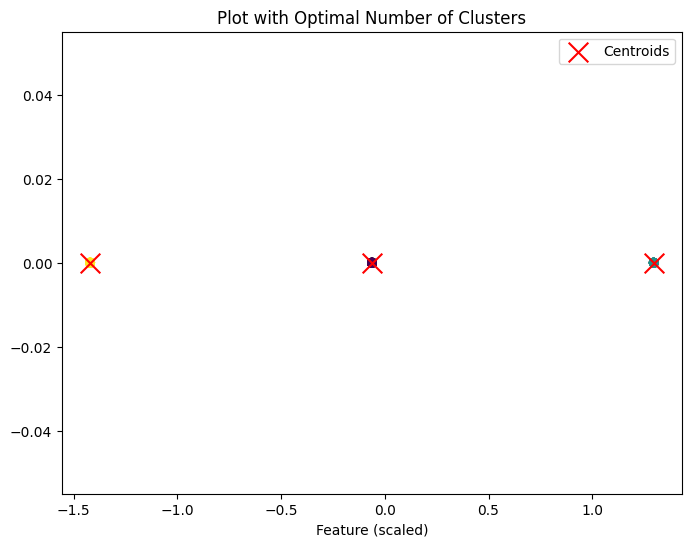

In [20]:
#Plot the optimal clusters with their centroids

if data_scaled.shape[1] == 1:
    plt.figure(figsize=(8, 6))
    
    # Plot the clusters in 1D
    plt.scatter(data_scaled[:, 0], np.zeros_like(data_scaled[:, 0]), c=kmeans_optimal.labels_, cmap='viridis', alpha=0.6)
    
    # Plot centroids (along the same 1D axis)
    plt.scatter(kmeans_optimal.cluster_centers_[:, 0], np.zeros_like(kmeans_optimal.cluster_centers_[:, 0]), 
                marker='x', s=200, c='red', label='Centroids')
    
    plt.title('Plot with Optimal Number of Clusters')
    plt.xlabel('Feature (scaled)')
    plt.legend()
    plt.show()


In [ ]:
#explination

# When plotting the data and doing a K-means cluster with the optimal number of clusters
# this is the output because there is only one feature that is being graphed due to the original
# data cleaning. The feature that is being used is the degree of malignancy which is on a scale of 1-3.
# With that in mind, it makes sense that the optimal number of clusters would be three 
# and that the centroids appear as though it is the only data point on the graph. Because the values graphed would be 
# integers 1, 2, or 3, it would appear that there is not much data variabiity. 